In [175]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os
import numpy as np
import torch.utils.data as Data
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim



In [176]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size=4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [177]:
imgs = torch.stack([img_t for img_t ,_ in trainset],dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [179]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()






(a)

In [180]:
input_size=32*32*3
output_size=10

In [181]:
# 0 hidden layers
class SD0(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(input_size,output_size),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

    
sd0=SD0()

In [182]:
# 1 hidden layers
class SD1(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(input_size,512),
            nn.ReLU(), 
            nn.Dropout(p=0.5),
            nn.Linear(512,output_size)
           
        )
        
    def forward(self, x):
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

    
sd1=SD1()

In [183]:
# 2 hidden layers
class SD2(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(input_size,512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, output_size )
        
         
        )
        
    def forward(self, x):
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

    
sd2=SD2()

In [184]:
# 3 hidden layers
class SD3(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(input_size,512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, output_size )
        
         
        )
        
    def forward(self, x):
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

    
sd3=SD3()

In [185]:
# 4 hidden layers
class SD4(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(input_size,512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, output_size )
        
         
        )
        
    def forward(self, x):
        x = torch.flatten(x,1)
        x = self.fc_layers(x)
        return x

    
sd4=SD4()

In [187]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net_acc=[]
for epoch in range(10):  # loop over the dataset multiple times
    
    net.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
    
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
   
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    net_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')



[1,  2000] loss: 1.067
[1,  4000] loss: 1.086
[1,  6000] loss: 1.078
[1,  8000] loss: 1.078
[1, 10000] loss: 1.088
[1, 12000] loss: 1.066
Accuracy of the network on the 10000 test images: 60 %
[2,  2000] loss: 1.001
[2,  4000] loss: 1.003
[2,  6000] loss: 1.017
[2,  8000] loss: 1.037
[2, 10000] loss: 1.013
[2, 12000] loss: 1.035
Accuracy of the network on the 10000 test images: 59 %
[3,  2000] loss: 0.924
[3,  4000] loss: 0.954
[3,  6000] loss: 0.962
[3,  8000] loss: 0.967
[3, 10000] loss: 0.983
[3, 12000] loss: 0.971
Accuracy of the network on the 10000 test images: 61 %
[4,  2000] loss: 0.876
[4,  4000] loss: 0.904
[4,  6000] loss: 0.914
[4,  8000] loss: 0.926
[4, 10000] loss: 0.943
[4, 12000] loss: 0.946
Accuracy of the network on the 10000 test images: 63 %
[5,  2000] loss: 0.833
[5,  4000] loss: 0.845
[5,  6000] loss: 0.879
[5,  8000] loss: 0.894
[5, 10000] loss: 0.911
[5, 12000] loss: 0.935
Accuracy of the network on the 10000 test images: 62 %
[6,  2000] loss: 0.806
[6,  4000] l

In [189]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(sd0.parameters(), lr=0.001, momentum=0.9)

sd0_acc=[]
for epoch in range(10):  # loop over the dataset multiple times
    
    sd0.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
    
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = sd0(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
   
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = sd0(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    sd0_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')




[1,  2000] loss: 2.117
[1,  4000] loss: 2.052
[1,  6000] loss: 2.051
[1,  8000] loss: 2.029
[1, 10000] loss: 2.023
[1, 12000] loss: 2.020
Accuracy of the network on the 10000 test images: 34 %
[2,  2000] loss: 1.964
[2,  4000] loss: 1.967
[2,  6000] loss: 1.978
[2,  8000] loss: 1.971
[2, 10000] loss: 1.978
[2, 12000] loss: 1.951
Accuracy of the network on the 10000 test images: 36 %
[3,  2000] loss: 1.917
[3,  4000] loss: 1.930
[3,  6000] loss: 1.959
[3,  8000] loss: 1.953
[3, 10000] loss: 1.971
[3, 12000] loss: 1.974
Accuracy of the network on the 10000 test images: 35 %
[4,  2000] loss: 1.904
[4,  4000] loss: 1.901
[4,  6000] loss: 1.904
[4,  8000] loss: 1.938
[4, 10000] loss: 1.959
[4, 12000] loss: 1.977
Accuracy of the network on the 10000 test images: 31 %
[5,  2000] loss: 1.895
[5,  4000] loss: 1.928
[5,  6000] loss: 1.904
[5,  8000] loss: 1.930
[5, 10000] loss: 1.958
[5, 12000] loss: 1.924
Accuracy of the network on the 10000 test images: 36 %
[6,  2000] loss: 1.849
[6,  4000] l

In [190]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(sd1.parameters(), lr=0.001, momentum=0.9)

sd1_acc=[]
for epoch in range(10):  # loop over the dataset multiple times
    
    sd1.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
    
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = sd1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
   
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = sd1(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    sd1_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 1.921
[1,  4000] loss: 1.858
[1,  6000] loss: 1.884
[1,  8000] loss: 1.887
[1, 10000] loss: 1.871
[1, 12000] loss: 1.874
Accuracy of the network on the 10000 test images: 39 %
[2,  2000] loss: 1.830
[2,  4000] loss: 1.836
[2,  6000] loss: 1.868
[2,  8000] loss: 1.844
[2, 10000] loss: 1.864
[2, 12000] loss: 1.834
Accuracy of the network on the 10000 test images: 38 %
[3,  2000] loss: 1.798
[3,  4000] loss: 1.825
[3,  6000] loss: 1.839
[3,  8000] loss: 1.861
[3, 10000] loss: 1.801
[3, 12000] loss: 1.857
Accuracy of the network on the 10000 test images: 40 %
[4,  2000] loss: 1.798
[4,  4000] loss: 1.787
[4,  6000] loss: 1.837
[4,  8000] loss: 1.797
[4, 10000] loss: 1.806
[4, 12000] loss: 1.798
Accuracy of the network on the 10000 test images: 40 %
[5,  2000] loss: 1.776
[5,  4000] loss: 1.789
[5,  6000] loss: 1.772
[5,  8000] loss: 1.776
[5, 10000] loss: 1.795
[5, 12000] loss: 1.762
Accuracy of the network on the 10000 test images: 41 %
[6,  2000] loss: 1.740
[6,  4000] l

In [191]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(sd2.parameters(), lr=0.001, momentum=0.9)

sd2_acc=[]
for epoch in range(10):  # loop over the dataset multiple times
    
    sd2.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
    
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = sd2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
   
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = sd2(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    sd2_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.015
[1,  4000] loss: 1.863
[1,  6000] loss: 1.814
[1,  8000] loss: 1.780
[1, 10000] loss: 1.758
[1, 12000] loss: 1.747
Accuracy of the network on the 10000 test images: 38 %
[2,  2000] loss: 1.685
[2,  4000] loss: 1.670
[2,  6000] loss: 1.694
[2,  8000] loss: 1.701
[2, 10000] loss: 1.695
[2, 12000] loss: 1.697
Accuracy of the network on the 10000 test images: 41 %
[3,  2000] loss: 1.653
[3,  4000] loss: 1.653
[3,  6000] loss: 1.656
[3,  8000] loss: 1.657
[3, 10000] loss: 1.639
[3, 12000] loss: 1.642
Accuracy of the network on the 10000 test images: 41 %
[4,  2000] loss: 1.620
[4,  4000] loss: 1.627
[4,  6000] loss: 1.625
[4,  8000] loss: 1.614
[4, 10000] loss: 1.626
[4, 12000] loss: 1.605
Accuracy of the network on the 10000 test images: 43 %
[5,  2000] loss: 1.585
[5,  4000] loss: 1.610
[5,  6000] loss: 1.598
[5,  8000] loss: 1.615
[5, 10000] loss: 1.602
[5, 12000] loss: 1.584
Accuracy of the network on the 10000 test images: 42 %
[6,  2000] loss: 1.583
[6,  4000] l

In [192]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(sd3.parameters(), lr=0.001, momentum=0.9)

sd3_acc=[]
for epoch in range(10):  # loop over the dataset multiple times
    
    sd3.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
    
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = sd3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
   
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = sd3(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    sd3_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.109
[1,  4000] loss: 1.910
[1,  6000] loss: 1.861
[1,  8000] loss: 1.810
[1, 10000] loss: 1.811
[1, 12000] loss: 1.769
Accuracy of the network on the 10000 test images: 37 %
[2,  2000] loss: 1.735
[2,  4000] loss: 1.732
[2,  6000] loss: 1.707
[2,  8000] loss: 1.720
[2, 10000] loss: 1.711
[2, 12000] loss: 1.702
Accuracy of the network on the 10000 test images: 40 %
[3,  2000] loss: 1.672
[3,  4000] loss: 1.672
[3,  6000] loss: 1.648
[3,  8000] loss: 1.653
[3, 10000] loss: 1.647
[3, 12000] loss: 1.669
Accuracy of the network on the 10000 test images: 41 %
[4,  2000] loss: 1.630
[4,  4000] loss: 1.607
[4,  6000] loss: 1.612
[4,  8000] loss: 1.616
[4, 10000] loss: 1.616
[4, 12000] loss: 1.613
Accuracy of the network on the 10000 test images: 42 %
[5,  2000] loss: 1.575
[5,  4000] loss: 1.577
[5,  6000] loss: 1.591
[5,  8000] loss: 1.623
[5, 10000] loss: 1.595
[5, 12000] loss: 1.583
Accuracy of the network on the 10000 test images: 43 %
[6,  2000] loss: 1.573
[6,  4000] l

In [193]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(sd4.parameters(), lr=0.001, momentum=0.9)

sd4_acc=[]
for epoch in range(10):  # loop over the dataset multiple times
    
    sd4.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
    
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = sd4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
   
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = sd4(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    sd4_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.232
[1,  4000] loss: 2.016
[1,  6000] loss: 1.947
[1,  8000] loss: 1.887
[1, 10000] loss: 1.849
[1, 12000] loss: 1.819
Accuracy of the network on the 10000 test images: 35 %
[2,  2000] loss: 1.785
[2,  4000] loss: 1.768
[2,  6000] loss: 1.765
[2,  8000] loss: 1.742
[2, 10000] loss: 1.735
[2, 12000] loss: 1.738
Accuracy of the network on the 10000 test images: 39 %
[3,  2000] loss: 1.663
[3,  4000] loss: 1.686
[3,  6000] loss: 1.689
[3,  8000] loss: 1.678
[3, 10000] loss: 1.681
[3, 12000] loss: 1.665
Accuracy of the network on the 10000 test images: 41 %
[4,  2000] loss: 1.643
[4,  4000] loss: 1.644
[4,  6000] loss: 1.634
[4,  8000] loss: 1.621
[4, 10000] loss: 1.643
[4, 12000] loss: 1.642
Accuracy of the network on the 10000 test images: 41 %
[5,  2000] loss: 1.614
[5,  4000] loss: 1.612
[5,  6000] loss: 1.611
[5,  8000] loss: 1.603
[5, 10000] loss: 1.572
[5, 12000] loss: 1.596
Accuracy of the network on the 10000 test images: 43 %
[6,  2000] loss: 1.569
[6,  4000] l

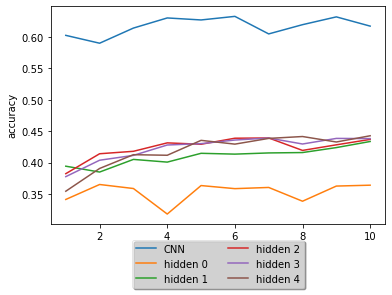

In [197]:
x=[1,2,3,4,5,6,7,8,9,10]
plt.plot(x,net_acc,label=f"CNN")
plt.plot(x, sd0_acc,label=f"hidden 0")
plt.plot(x, sd1_acc,label=f"hidden 1")
plt.plot(x, sd2_acc,label=f"hidden 2")
plt.plot(x, sd3_acc,label=f"hidden 3")
plt.plot(x, sd4_acc,label=f"hidden 4")
plt.ylabel('accuracy')
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

We can see that the convolutional neural network is better than the other simple dense neural networks. When the number of hidden layer increase, the performance decrease. Because the optimization is more difficult, the optimizer fails to find the best weights, the accuracy of neural networks are around 40% for the 10 epochs. Hence,the CNN is much better.

(b)

In [198]:
class Snet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


snet = Snet()

In [200]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(snet.parameters(), lr=0.001, momentum=0.9)

snet_acc=[]
for epoch in range(10):  # loop over the dataset multiple times
   
    snet.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
      
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = snet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = snet(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    snet_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.309
[1,  4000] loss: 2.310
[1,  6000] loss: 2.308
[1,  8000] loss: 2.308
[1, 10000] loss: 2.307
[1, 12000] loss: 2.307
Accuracy of the network on the 10000 test images: 10 %
[2,  2000] loss: 2.307
[2,  4000] loss: 2.307
[2,  6000] loss: 2.307
[2,  8000] loss: 2.306
[2, 10000] loss: 2.306
[2, 12000] loss: 2.306
Accuracy of the network on the 10000 test images: 10 %
[3,  2000] loss: 2.306
[3,  4000] loss: 2.306
[3,  6000] loss: 2.305
[3,  8000] loss: 2.304
[3, 10000] loss: 2.305
[3, 12000] loss: 2.305
Accuracy of the network on the 10000 test images: 10 %
[4,  2000] loss: 2.304
[4,  4000] loss: 2.304
[4,  6000] loss: 2.304
[4,  8000] loss: 2.304
[4, 10000] loss: 2.304
[4, 12000] loss: 2.303
Accuracy of the network on the 10000 test images: 10 %
[5,  2000] loss: 2.304
[5,  4000] loss: 2.303
[5,  6000] loss: 2.302
[5,  8000] loss: 2.302
[5, 10000] loss: 2.299
[5, 12000] loss: 2.293
Accuracy of the network on the 10000 test images: 14 %
[6,  2000] loss: 2.260
[6,  4000] l

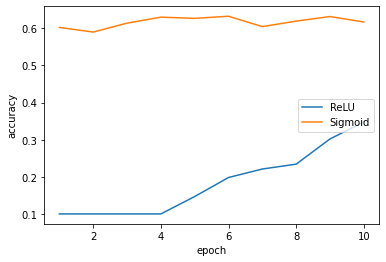

In [201]:
x=[1,2,3,4,5,6,7,8,9,10]
plt.plot(x,snet_acc,label=f"Sigmoid")
plt.plot(x,net_acc,label=f"CNN")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ReLU', 'Sigmoid'], loc='right')
plt.show()

We can see that it is obvious that the ReLU activation function is better than the sigmoid function in convolutional neural network since the accuracy for convolutional neural network with ReLU units is much higher that that with sigmoid units. Because the ReLU function does not have the gradient vanishing problem as in sigmoid function.

(c)

CNN Model without dropout and without Data Augmentation

In [240]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

tr_0drop_0aug_acc=[]
te_0drop_0aug_acc=[]
for epoch in range(30):  # loop over the dataset multiple times

    net.train()
    running_loss = 0.0
    train_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
      
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = (outputs.argmax(dim=-1) == labels).float().mean()
        # print statistics
        running_loss += loss.item()
        train_accs.append(acc)
        
    train_acc = sum(train_accs) / len(train_accs)
    tr_0drop_0aug_acc.append(train_acc)
    print(f"[ Train | {epoch + 1:03d}/{30:03d} ] , tr_acc = {train_acc:.5f}")
    
    
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc=correct / total
    te_0drop_0aug_acc.append(test_acc)
    print(f"[ Train | {epoch + 1:03d}/{30:03d} ] , te_acc = {test_acc:.5f}")

print('Finished Training')

[ Train | 001/030 ] , tr_acc = 0.79838
[ Train | 001/030 ] , te_acc = 0.57670
[ Train | 002/030 ] , tr_acc = 0.80054
[ Train | 002/030 ] , te_acc = 0.57860
[ Train | 003/030 ] , tr_acc = 0.80406
[ Train | 003/030 ] , te_acc = 0.57720
[ Train | 004/030 ] , tr_acc = 0.79902
[ Train | 004/030 ] , te_acc = 0.58010
[ Train | 005/030 ] , tr_acc = 0.79542
[ Train | 005/030 ] , te_acc = 0.58700
[ Train | 006/030 ] , tr_acc = 0.80394
[ Train | 006/030 ] , te_acc = 0.57060
[ Train | 007/030 ] , tr_acc = 0.80506
[ Train | 007/030 ] , te_acc = 0.58320
[ Train | 008/030 ] , tr_acc = 0.80164
[ Train | 008/030 ] , te_acc = 0.57360
[ Train | 009/030 ] , tr_acc = 0.79978
[ Train | 009/030 ] , te_acc = 0.58440
[ Train | 010/030 ] , tr_acc = 0.79762
[ Train | 010/030 ] , te_acc = 0.57750
[ Train | 011/030 ] , tr_acc = 0.79814
[ Train | 011/030 ] , te_acc = 0.57710
[ Train | 012/030 ] , tr_acc = 0.79908
[ Train | 012/030 ] , te_acc = 0.56820
[ Train | 013/030 ] , tr_acc = 0.79782
[ Train | 013/030 ] , te_

CNN Model with dropout and without Data Augmentation

In [241]:
## CNN Model with dropout
class dropNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.dropout(self.pool(F.relu(self.conv1(x))))
        x = self.dropout(self.pool(F.relu(self.conv2(x))))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x
     
        
dropnet=dropNet()
 

In [242]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(dropnet.parameters(), lr=0.001, momentum=0.9)

tr_1drop_0aug_acc=[]
te_1drop_0aug_acc=[]
for epoch in range(30):  # loop over the dataset multiple times
   
    dropnet.train()
    running_loss = 0.0
    
    train_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = dropnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = (outputs.argmax(dim=-1) == labels).float().mean()
        # print statistics
        running_loss += loss.item()
        train_accs.append(acc)
      
    train_acc = sum(train_accs) / len(train_accs)
    tr_1drop_0aug_acc.append(train_acc)
    print(f"[ Train | {epoch + 1:03d}/{30:03d} ] , tr_acc = {train_acc:.5f}")
    
    
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = dropnet(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc=correct / total
    te_1drop_0aug_acc.append(test_acc)
    print(f"[ Train | {epoch + 1:03d}/{30:03d} ] , te_acc = {test_acc:.5f}")

print('Finished Training')

[ Train | 001/030 ] , tr_acc = 0.32556
[ Train | 001/030 ] , te_acc = 0.42070
[ Train | 002/030 ] , tr_acc = 0.44480
[ Train | 002/030 ] , te_acc = 0.46440
[ Train | 003/030 ] , tr_acc = 0.48508
[ Train | 003/030 ] , te_acc = 0.49610
[ Train | 004/030 ] , tr_acc = 0.50866
[ Train | 004/030 ] , te_acc = 0.50600
[ Train | 005/030 ] , tr_acc = 0.52652
[ Train | 005/030 ] , te_acc = 0.50350
[ Train | 006/030 ] , tr_acc = 0.53980
[ Train | 006/030 ] , te_acc = 0.52730
[ Train | 007/030 ] , tr_acc = 0.54858
[ Train | 007/030 ] , te_acc = 0.55830
[ Train | 008/030 ] , tr_acc = 0.55834
[ Train | 008/030 ] , te_acc = 0.54310
[ Train | 009/030 ] , tr_acc = 0.56778
[ Train | 009/030 ] , te_acc = 0.55950
[ Train | 010/030 ] , tr_acc = 0.57398
[ Train | 010/030 ] , te_acc = 0.57170
[ Train | 011/030 ] , tr_acc = 0.57852
[ Train | 011/030 ] , te_acc = 0.56150
[ Train | 012/030 ] , tr_acc = 0.58230
[ Train | 012/030 ] , te_acc = 0.56170
[ Train | 013/030 ] , tr_acc = 0.58610
[ Train | 013/030 ] , te_

Make transformation

In [243]:
transform2 = transforms.Compose(
    [transforms.RandomRotation(15),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset2 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform2)
trainloader2 = torch.utils.data.DataLoader(trainset2, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset2 = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform2)
testloader2 = torch.utils.data.DataLoader(testset2, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [244]:

class Nettrans(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_trans = Nettrans()

In [251]:
class dropNettrans(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.dropout(self.pool(F.relu(self.conv1(x))))
        x = self.dropout(self.pool(F.relu(self.conv2(x))))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x
     
        
dropnet_trans=dropNettrans()

Original CNN Model without dropout and with Data Augmentation

In [252]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_trans.parameters(), lr=0.001, momentum=0.9)

tr_0drop_1aug_acc=[]
te_0drop_1aug_acc=[]
for epoch in range(30):  # loop over the dataset multiple times

    net_trans.train()
    running_loss = 0.0
    train_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
      
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net_trans(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = (outputs.argmax(dim=-1) == labels).float().mean()

        # print statistics
        running_loss += loss.item()
        train_accs.append(acc)
        
    train_acc = sum(train_accs) / len(train_accs)
    tr_0drop_1aug_acc.append(train_acc)
    print(f"[ Train | {epoch + 1:03d}/{30:03d} ] , tr_acc = {train_acc:.5f}")
    
    
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net_trans(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc=correct / total
    te_0drop_1aug_acc.append(test_acc)
    print(f"[ Train | {epoch + 1:03d}/{30:03d} ] , te_acc = {test_acc:.5f}")

print('Finished Training')

[ Train | 001/030 ] , tr_acc = 0.77358
[ Train | 001/030 ] , te_acc = 0.60120
[ Train | 002/030 ] , tr_acc = 0.77734
[ Train | 002/030 ] , te_acc = 0.60630
[ Train | 003/030 ] , tr_acc = 0.77460
[ Train | 003/030 ] , te_acc = 0.59980
[ Train | 004/030 ] , tr_acc = 0.77936
[ Train | 004/030 ] , te_acc = 0.59850
[ Train | 005/030 ] , tr_acc = 0.78322
[ Train | 005/030 ] , te_acc = 0.59470
[ Train | 006/030 ] , tr_acc = 0.78182
[ Train | 006/030 ] , te_acc = 0.58680
[ Train | 007/030 ] , tr_acc = 0.78220
[ Train | 007/030 ] , te_acc = 0.58900
[ Train | 008/030 ] , tr_acc = 0.78592
[ Train | 008/030 ] , te_acc = 0.59250
[ Train | 009/030 ] , tr_acc = 0.78630
[ Train | 009/030 ] , te_acc = 0.58450
[ Train | 010/030 ] , tr_acc = 0.78852
[ Train | 010/030 ] , te_acc = 0.59000
[ Train | 011/030 ] , tr_acc = 0.79040
[ Train | 011/030 ] , te_acc = 0.58900
[ Train | 012/030 ] , tr_acc = 0.79098
[ Train | 012/030 ] , te_acc = 0.58550
[ Train | 013/030 ] , tr_acc = 0.79002
[ Train | 013/030 ] , te_

Original CNN Model with dropout and with Data Augmentation

In [253]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD( dropnet_trans.parameters(), lr=0.001, momentum=0.9)

tr_1drop_1aug_acc=[]
te_1drop_1aug_acc=[]
for epoch in range(30):  # loop over the dataset multiple times

    dropnet_trans.train()
    running_loss = 0.0
    train_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
      
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs =  dropnet_trans(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        acc = (outputs.argmax(dim=-1) == labels).float().mean()

        # print statistics
        running_loss += loss.item()
        train_accs.append(acc)
        
    train_acc = sum(train_accs) / len(train_accs)
    tr_1drop_1aug_acc.append(train_acc)
    print(f"[ Train | {epoch + 1:03d}/{30:03d} ] , tr_acc = {train_acc:.5f}")
    
    
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs =  dropnet_trans(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc=correct / total
    te_1drop_1aug_acc.append(test_acc)
    print(f"[ Train | {epoch + 1:03d}/{30:03d} ] , te_acc = {test_acc:.5f}")

print('Finished Training')

[ Train | 001/030 ] , tr_acc = 0.33510
[ Train | 001/030 ] , te_acc = 0.43330
[ Train | 002/030 ] , tr_acc = 0.45146
[ Train | 002/030 ] , te_acc = 0.45540
[ Train | 003/030 ] , tr_acc = 0.48754
[ Train | 003/030 ] , te_acc = 0.48590
[ Train | 004/030 ] , tr_acc = 0.51208
[ Train | 004/030 ] , te_acc = 0.51120
[ Train | 005/030 ] , tr_acc = 0.53178
[ Train | 005/030 ] , te_acc = 0.52720
[ Train | 006/030 ] , tr_acc = 0.54108
[ Train | 006/030 ] , te_acc = 0.54470
[ Train | 007/030 ] , tr_acc = 0.55128
[ Train | 007/030 ] , te_acc = 0.53640
[ Train | 008/030 ] , tr_acc = 0.55626
[ Train | 008/030 ] , te_acc = 0.55490
[ Train | 009/030 ] , tr_acc = 0.56698
[ Train | 009/030 ] , te_acc = 0.55330
[ Train | 010/030 ] , tr_acc = 0.57132
[ Train | 010/030 ] , te_acc = 0.56530
[ Train | 011/030 ] , tr_acc = 0.57834
[ Train | 011/030 ] , te_acc = 0.55610
[ Train | 012/030 ] , tr_acc = 0.58004
[ Train | 012/030 ] , te_acc = 0.56730
[ Train | 013/030 ] , tr_acc = 0.58576
[ Train | 013/030 ] , te_

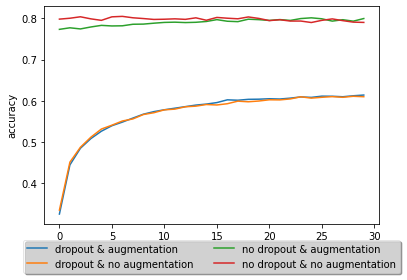

In [254]:
plt.plot(tr_1drop_0aug_acc, label=f"dropout & augmentation")
plt.plot(tr_1drop_1aug_acc, label=f"dropout & no augmentation")
plt.plot(tr_0drop_1aug_acc, label=f"no dropout & augmentation")
plt.plot(tr_0drop_0aug_acc, label=f"no dropout & no augmentation")
plt.ylabel('accuracy')
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

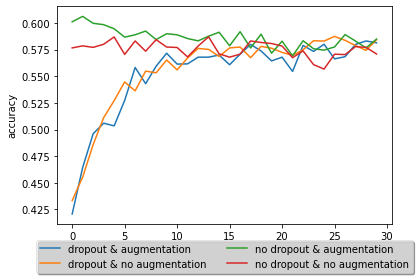

In [255]:
plt.plot(te_1drop_0aug_acc, label=f"dropout & augmentation")
plt.plot(te_1drop_1aug_acc, label=f"dropout & no augmentation")
plt.plot(te_0drop_1aug_acc, label=f"no dropout & augmentation")
plt.plot(te_0drop_0aug_acc, label=f"no dropout & no augmentation")
plt.ylabel('accuracy')
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

According 30 epochs, we can easily see the trend of those curves. We can see that Model which is without dropout and without data augmentation and which is without dropout and with augmentation have the highest accuracy in both training datas and test datas. And others are much lower. 